<a href="https://colab.research.google.com/github/devikamsba2024/WSDM_ChatbotArena/blob/main/WSDM_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

wsdm_cup_multilingual_chatbot_arena_path = kagglehub.competition_download('wsdm-cup-multilingual-chatbot-arena')

print('Data source import complete.')


100%|██████████| 108M/108M [00:01<00:00, 82.9MB/s] 

Extracting files...


Data source import complete.


In [4]:
# Data Overview and Basic Statistics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## **Data Overview and Basic Statistics**

In [5]:
# Load the dataset
df = pd.read_parquet(os.path.join(wsdm_cup_multilingual_chatbot_arena_path, 'train.parquet'))  # Update with your actual file path

# 1. Basic dataset information
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

Dataset Shape: (48439, 8)

First 5 rows:
                                                  id  \
0  00007cff95d7f7974642a785aca248b0f26e60d3312fac...   
1  00010ed04b536f56ebe43eef1100c13906abea12bf9855...   
2  0003800d510e38803efba5ceaec122bc66408fe367b0be...   
3  00072026c68f5418ef2da238394e418ce72a534b9b22d5...   
4  0007ce7cf6bc1b5a8f8a4669b854fb12030863c970d9dc...   

                                              prompt  \
0                                 vieš po Slovensky?   
1  You will be given a piece of news. Analyze it ...   
2  Dört basamaklı, rakamları birbirinden ve sıfır...   
3  현재 추천된 탑 3 종목인 Cabaletta Bio (CABA), Rocket Ph...   
4                                  Please be boring    

                                          response_a  \
0   Áno, hovorím po slovensky. Ako vám môžem pomôcť?   
1  Let's break down the news and analyze it accor...   
2  Bu soruyu çözmek için, verilen koşulları adım ...   
3  죄송하지만 저는 금융 조언을 제공할 수 없습니다. 저는 AI 모델이며, 투자 결정에...   
4  Al

## **Data types and missing values**

In [6]:
# 2. Data types and missing values
print("\nData Types:")
print(df.dtypes)
print("\nMissing Values Summary:")
print(df.isnull().sum())
print(f"Total Missing Values: {df.isnull().sum().sum()}")


Data Types:
id            object
prompt        object
response_a    object
response_b    object
winner        object
model_a       object
model_b       object
language      object
dtype: object

Missing Values Summary:
id            0
prompt        0
response_a    0
response_b    0
winner        0
model_a       0
model_b       0
language      0
dtype: int64
Total Missing Values: 0


## **Language distribution**

In [7]:
# 3. Language distribution
print("\nLanguage Distribution:")
lang_counts = df['language'].value_counts()
print(lang_counts)
print("\nLanguage Distribution (Percentage):")
print(100 * lang_counts / len(df))



Language Distribution:
language
English       25211
Russian        6455
Chinese        4310
Vietnamese     3103
German         1402
              ...  
Klingon           1
Kurdish           1
Hawaiian          1
Telugu            1
Sindhi            1
Name: count, Length: 128, dtype: int64

Language Distribution (Percentage):
language
English       52.046904
Russian       13.326039
Chinese        8.897789
Vietnamese     6.405995
German         2.894362
                ...    
Klingon        0.002064
Kurdish        0.002064
Hawaiian       0.002064
Telugu         0.002064
Sindhi         0.002064
Name: count, Length: 128, dtype: float64


## **winner distribution**

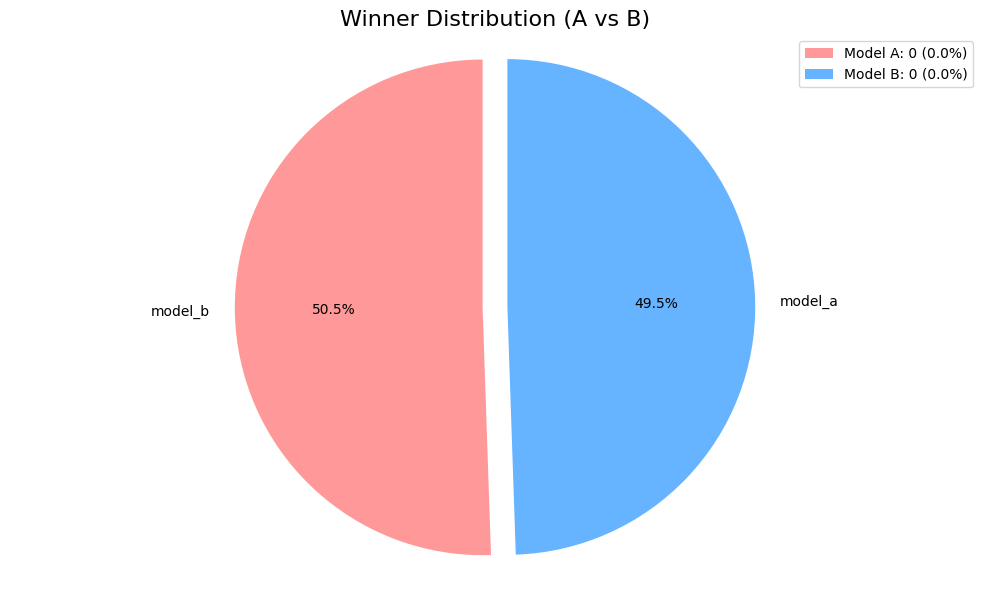

/tmp/ipython-input-8-2342705743.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=winner_counts.index, y=winner_counts.values, palette=['#ff9999','#66b3ff'])


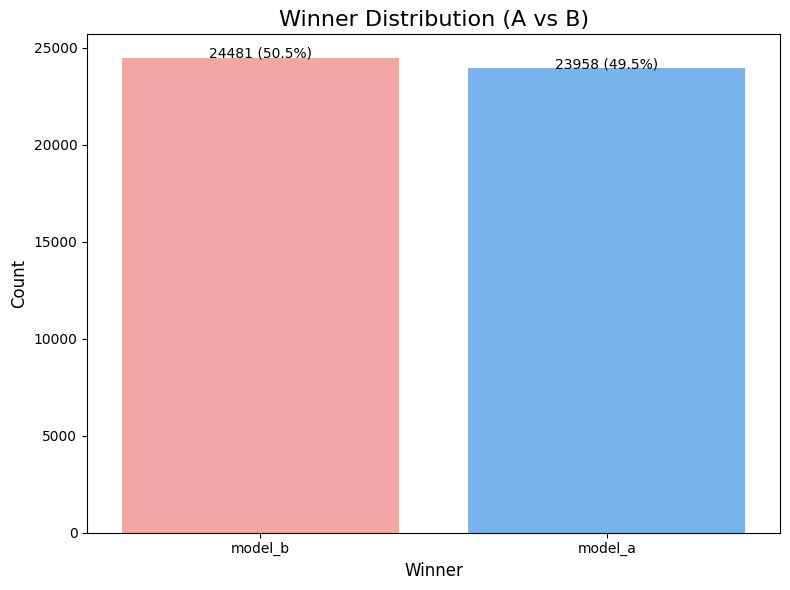

In [8]:
# Get winner distribution
winner_counts = df['winner'].value_counts()
total_samples = len(df)

# Create pie chart
plt.figure(figsize=(10, 6))
plt.pie(winner_counts, labels=winner_counts.index, autopct='%1.1f%%',
        colors=['#ff9999','#66b3ff'], startangle=90, explode=[0.05, 0.05])
plt.title('Winner Distribution (A vs B)', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.legend([f"Model A: {winner_counts.get('A', 0)} ({winner_counts.get('A', 0)/total_samples*100:.1f}%)",
            f"Model B: {winner_counts.get('B', 0)} ({winner_counts.get('B', 0)/total_samples*100:.1f}%)"],
           loc="best")
plt.tight_layout()
plt.show()

# Create bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=winner_counts.index, y=winner_counts.values, palette=['#ff9999','#66b3ff'])
plt.title('Winner Distribution (A vs B)', fontsize=16)
plt.xlabel('Winner', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add count and percentage on top of bars
for i, v in enumerate(winner_counts.values):
    plt.text(i, v + 5, f"{v} ({v/total_samples*100:.1f}%)", ha='center')

plt.tight_layout()
plt.show()

## **Model distribution**

In [9]:
# 4. Model distribution

model_a_counts = df['model_a'].value_counts()

model_b_counts = df['model_b'].value_counts()


model_counts_df = pd.DataFrame({
    'Model A': model_a_counts,
    'Model B': model_b_counts
}).fillna(0).astype(int)  # Fill NaNs with 0 and convert to int

# Print the resulting DataFrame
print("\nModel A vs Model B Distribution:")
print(model_counts_df)


Model A vs Model B Distribution:
                                 Model A  Model B
athene-70b-0725                      189      149
c4ai-aya-expanse-32b                 225      224
chatgpt-4o-latest-20240808           668      707
chatgpt-4o-latest-20240903          1863     1839
claude-3-5-sonnet-20240620          1255     1281
claude-3-5-sonnet-20241022           552      533
claude-3-haiku-20240307              866      909
claude-3-opus-20240229              1665     1748
command-r-08-2024                   1037      976
command-r-plus-08-2024              1001      995
deepseek-coder-v2-0724               114      118
deepseek-v2-api-0628                  59       72
deepseek-v2.5                        830      806
gemini-1.5-flash-001                 372      389
gemini-1.5-flash-002                1329     1357
gemini-1.5-flash-8b-001             1436     1427
gemini-1.5-flash-8b-exp-0827        1047     1072
gemini-1.5-flash-exp-0827            553      615
gemini-1.5-pro-0

In [10]:
# 5. Overall models used (combining model_a and model_b)
all_models = pd.concat([df['model_a'], df['model_b']]).value_counts()
print("\nAll Models Distribution:")
print(all_models)



All Models Distribution:
chatgpt-4o-latest-20240903         3702
gemini-1.5-pro-002                 3587
claude-3-opus-20240229             3413
yi-lightning-lite                  3328
qwen-max-0919                      3212
llama-3.1-405b-instruct-bf16       2951
gemini-1.5-flash-8b-001            2863
grok-2-2024-08-13                  2806
gemini-1.5-flash-002               2686
qwen-plus-0828                     2658
claude-3-5-sonnet-20240620         2536
o1-mini                            2403
gemma-2-2b-it                      2391
o1-preview                         2366
internlm2_5-20b-chat               2306
yi-lightning                       2280
llama-3.2-1b-instruct              2119
gemini-1.5-flash-8b-exp-0827       2119
command-r-08-2024                  2013
command-r-plus-08-2024             1996
mistral-large-2407                 1987
llama-3.2-3b-instruct              1966
glm-4-plus                         1931
grok-2-mini-2024-08-13             1858
qwen2.5-72b-in

## **Top 20 languages**

/tmp/ipython-input-11-4094733214.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_languages.values, y=top_20_languages.index, palette='viridis')


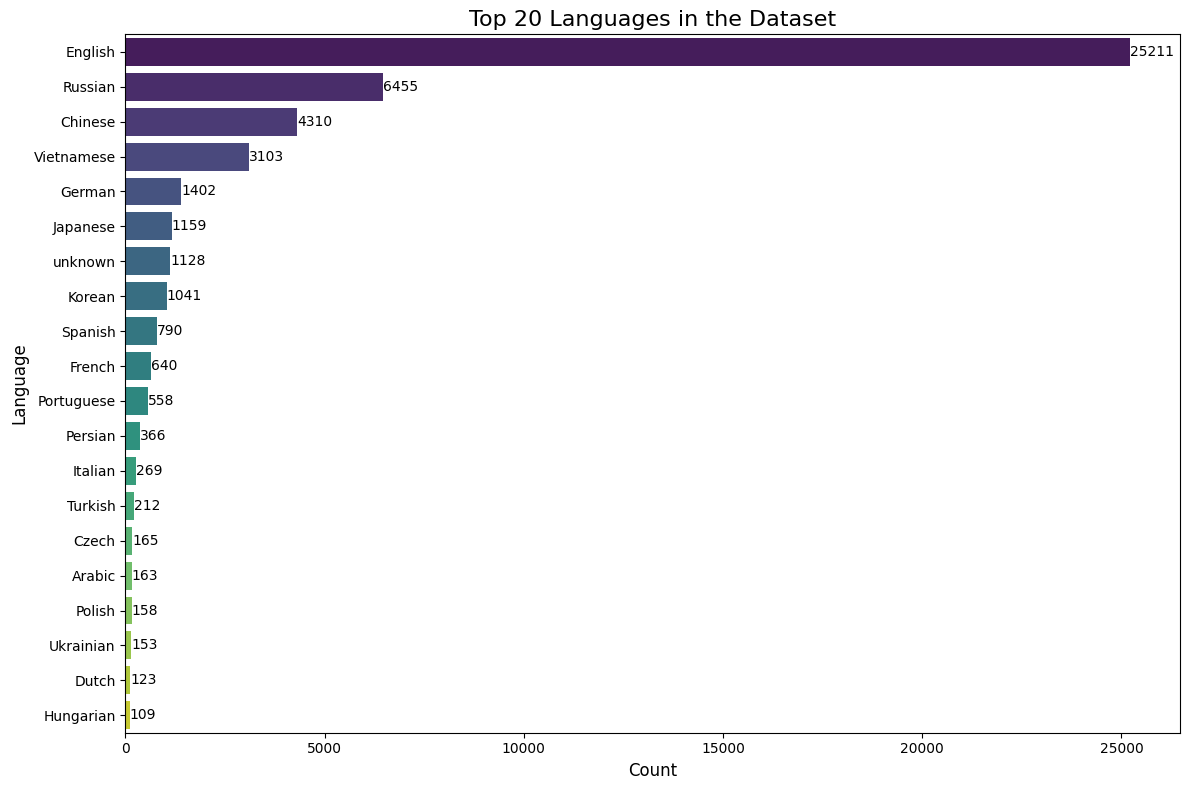

In [11]:


# Get language distribution
language_counts = df['language'].value_counts()

# Get top 20 languages
top_20_languages = language_counts.head(20)

# Create a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=top_20_languages.values, y=top_20_languages.index, palette='viridis')

# Add labels and title
plt.title('Top 20 Languages in the Dataset', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Language', fontsize=12)

# Add count values at the end of each bar
for i, v in enumerate(top_20_languages.values):
    plt.text(v + 0.5, i, str(v), va='center')

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()



## **Model Distribution**

/tmp/ipython-input-12-3256361358.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_models.values, y=top_models.index, palette='coolwarm')


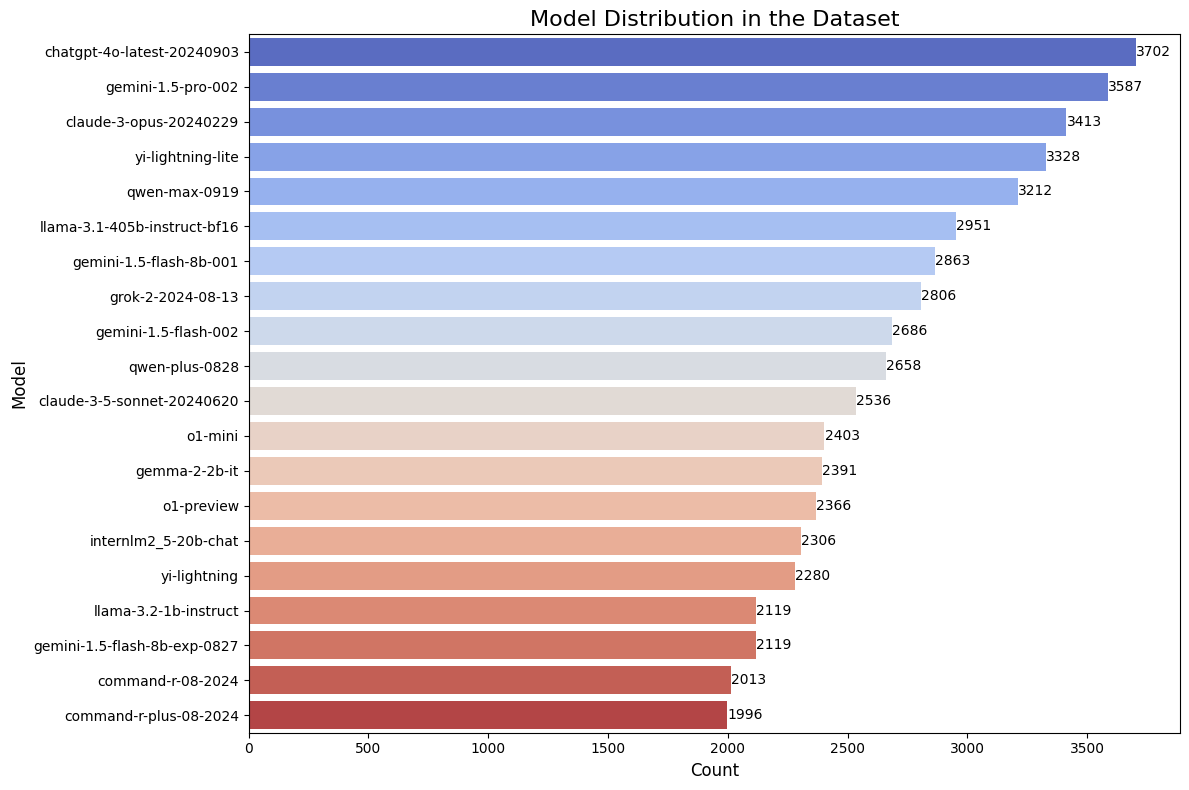

In [12]:
# Get top models (if there are too many)
top_models = all_models.head(20)  # Adjust number if needed

# Create a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=top_models.values, y=top_models.index, palette='coolwarm')

# Add labels and title
plt.title('Model Distribution in the Dataset', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Model', fontsize=12)

# Add count values at the end of each bar
for i, v in enumerate(top_models.values):
    plt.text(v + 0.5, i, str(v), va='center')

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()


## **Word Count**

Descriptive Statistics for Word Counts:
       prompt_word_count  response_a_word_count  response_b_word_count  \
count       48439.000000           48439.000000           48439.000000   
mean          121.658808             293.452714             294.143294   
std           364.760289             276.278870             275.319280   
min             0.000000               1.000000               1.000000   
25%             9.000000              94.000000              94.000000   
50%            22.000000             241.000000             242.000000   
75%            73.000000             419.000000             421.000000   
max          7160.000000            6476.000000            6061.000000   

       combined_word_count  
count         48439.000000  
mean            709.254815  
std             667.944098  
min               3.000000  
25%             260.000000  
50%             574.000000  
75%             954.000000  
max           11140.000000  


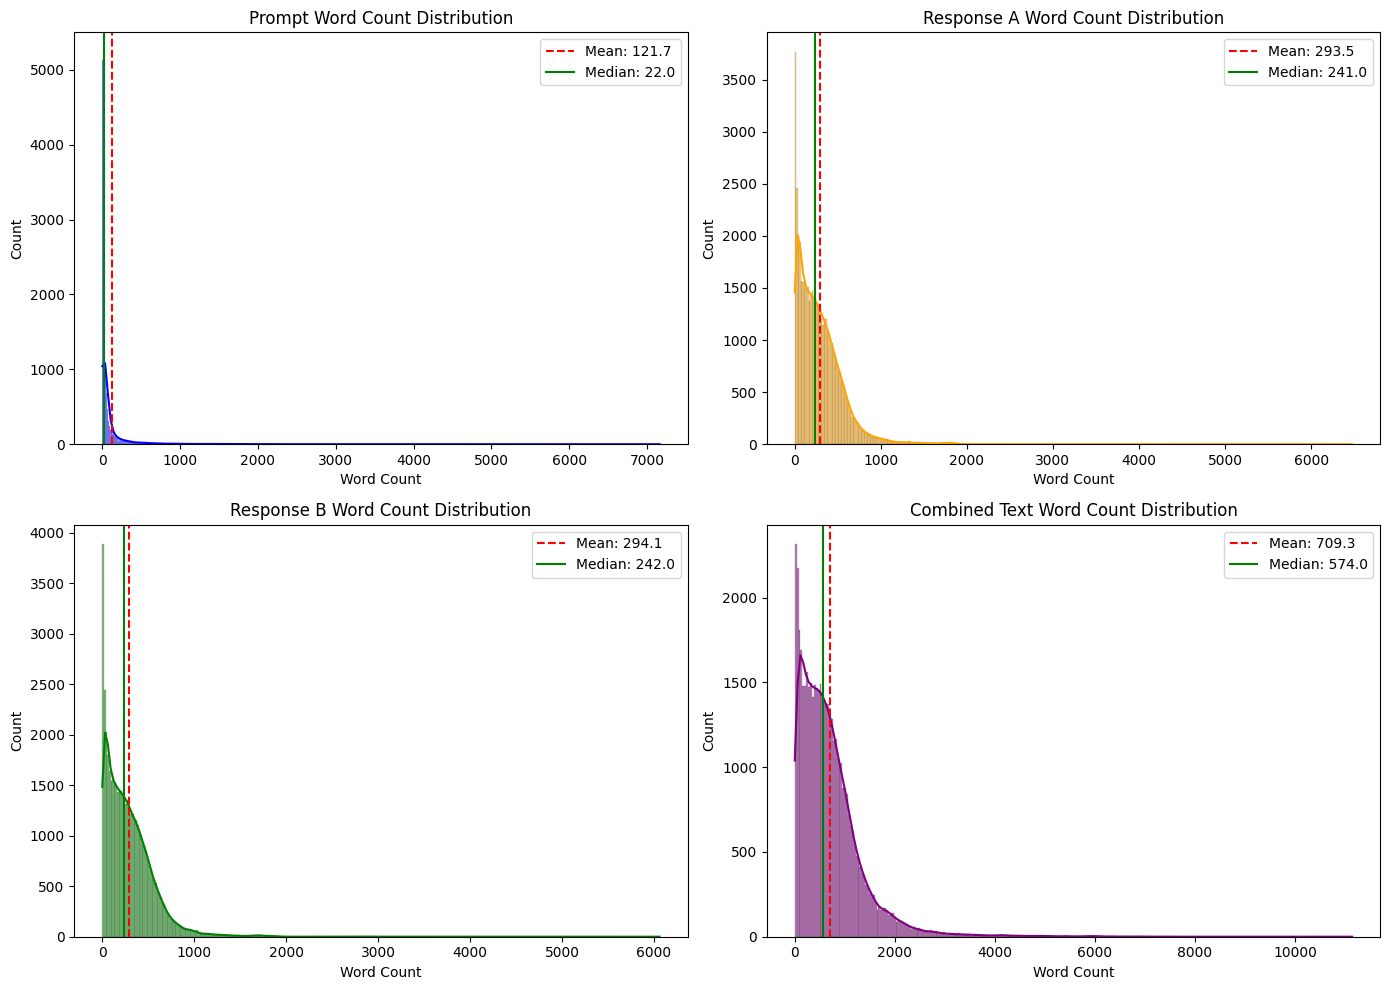

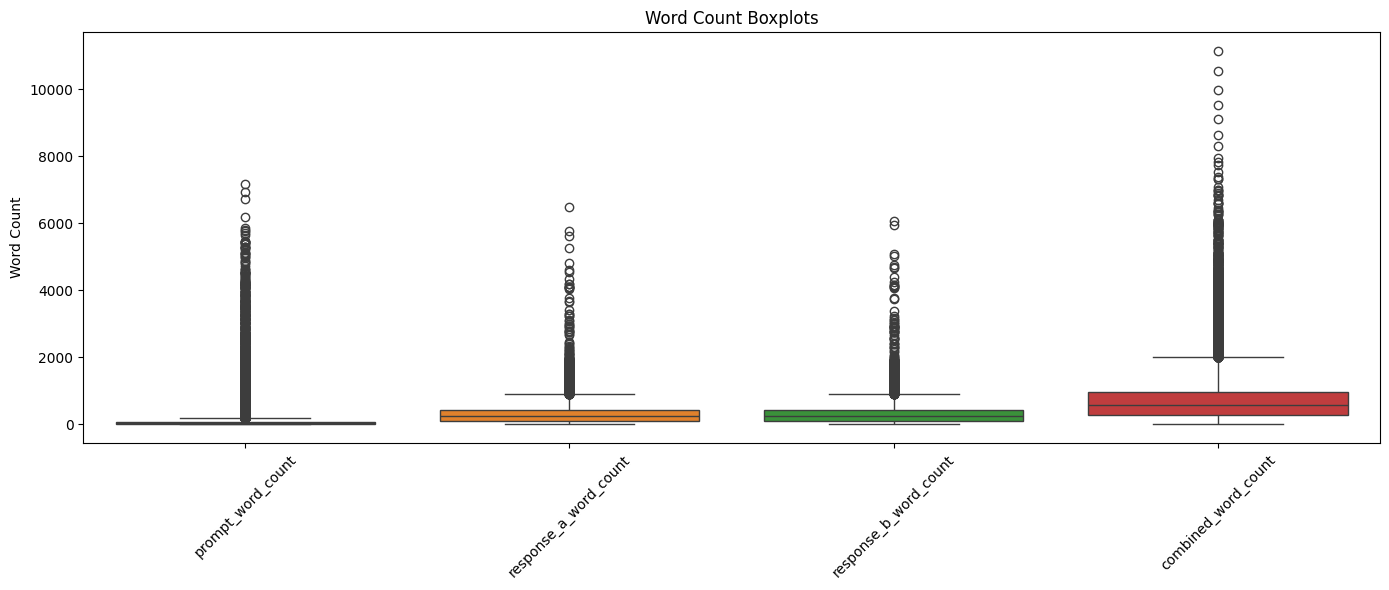


Word Count Statistics for Winners vs Losers:
       winner_word_count  loser_word_count
count       48439.000000      48439.000000
mean          294.143294        293.452714
std           275.319280        276.278870
min             1.000000          1.000000
25%            94.000000         94.000000
50%           242.000000        241.000000
75%           421.000000        419.000000
max          6061.000000       6476.000000


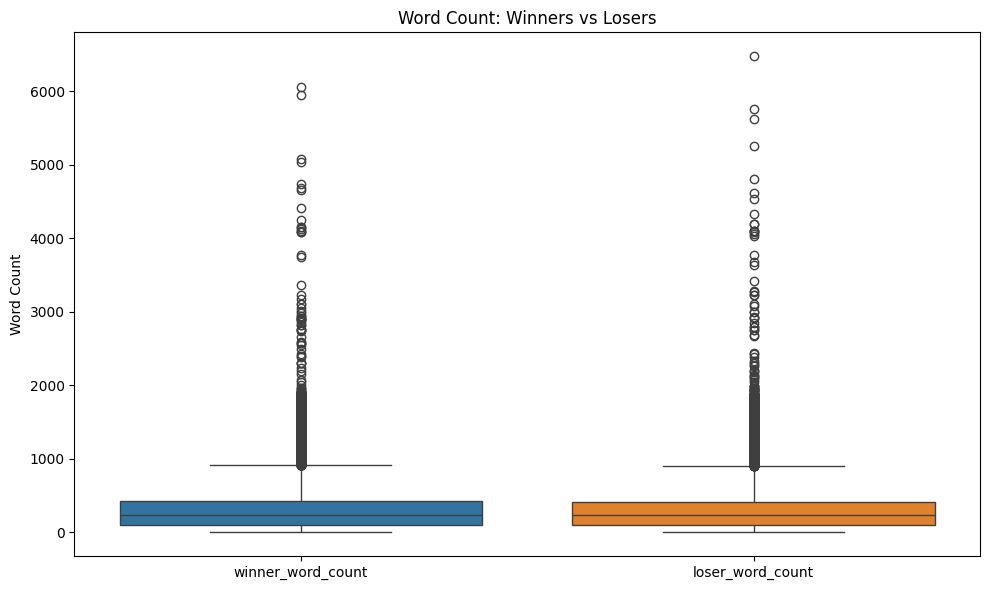

In [13]:
# Function to count words
def count_words(text):
    if isinstance(text, str):
        return len(text.split())
    return 0  # Handle non-string entries

# Calculate word counts
df['prompt_word_count'] = df['prompt'].apply(count_words)
df['response_a_word_count'] = df['response_a'].apply(count_words)
df['response_b_word_count'] = df['response_b'].apply(count_words)

# Create combined text column (prompt + both responses)
df['combined_text'] = df['prompt'] + ' ' + df['response_a'] + ' ' + df['response_b']
df['combined_word_count'] = df['combined_text'].apply(count_words)

# Get descriptive statistics for word counts
word_count_stats = df[['prompt_word_count', 'response_a_word_count',
                        'response_b_word_count', 'combined_word_count']].describe()

print("Descriptive Statistics for Word Counts:")
print(word_count_stats)

# Create visualization for word count distributions
plt.figure(figsize=(14, 10))

# Prompt word count
plt.subplot(2, 2, 1)
sns.histplot(df['prompt_word_count'], kde=True, color='blue')
plt.title('Prompt Word Count Distribution')
plt.xlabel('Word Count')
plt.axvline(df['prompt_word_count'].mean(), color='red', linestyle='--',
            label=f'Mean: {df["prompt_word_count"].mean():.1f}')
plt.axvline(df['prompt_word_count'].median(), color='green', linestyle='-',
            label=f'Median: {df["prompt_word_count"].median():.1f}')
plt.legend()

# Response A word count
plt.subplot(2, 2, 2)
sns.histplot(df['response_a_word_count'], kde=True, color='orange')
plt.title('Response A Word Count Distribution')
plt.xlabel('Word Count')
plt.axvline(df['response_a_word_count'].mean(), color='red', linestyle='--',
            label=f'Mean: {df["response_a_word_count"].mean():.1f}')
plt.axvline(df['response_a_word_count'].median(), color='green', linestyle='-',
            label=f'Median: {df["response_a_word_count"].median():.1f}')
plt.legend()

# Response B word count
plt.subplot(2, 2, 3)
sns.histplot(df['response_b_word_count'], kde=True, color='green')
plt.title('Response B Word Count Distribution')
plt.xlabel('Word Count')
plt.axvline(df['response_b_word_count'].mean(), color='red', linestyle='--',
            label=f'Mean: {df["response_b_word_count"].mean():.1f}')
plt.axvline(df['response_b_word_count'].median(), color='green', linestyle='-',
            label=f'Median: {df["response_b_word_count"].median():.1f}')
plt.legend()

# Combined text word count
plt.subplot(2, 2, 4)
sns.histplot(df['combined_word_count'], kde=True, color='purple')
plt.title('Combined Text Word Count Distribution')
plt.xlabel('Word Count')
plt.axvline(df['combined_word_count'].mean(), color='red', linestyle='--',
            label=f'Mean: {df["combined_word_count"].mean():.1f}')
plt.axvline(df['combined_word_count'].median(), color='green', linestyle='-',
            label=f'Median: {df["combined_word_count"].median():.1f}')
plt.legend()

plt.tight_layout()
plt.show()

# Create boxplots to visualize the distribution and identify outliers
plt.figure(figsize=(14, 6))
word_counts_df = df[['prompt_word_count', 'response_a_word_count',
                     'response_b_word_count', 'combined_word_count']]
sns.boxplot(data=word_counts_df)
plt.title('Word Count Boxplots')
plt.ylabel('Word Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Compare response lengths between winning and losing responses
df['winner_word_count'] = df.apply(
    lambda row: row['response_a_word_count'] if row['winner'] == 'A' else row['response_b_word_count'],
    axis=1
)
df['loser_word_count'] = df.apply(
    lambda row: row['response_b_word_count'] if row['winner'] == 'A' else row['response_a_word_count'],
    axis=1
)

print("\nWord Count Statistics for Winners vs Losers:")
print(df[['winner_word_count', 'loser_word_count']].describe())

# Visualize winner vs loser word counts
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['winner_word_count', 'loser_word_count']])
plt.title('Word Count: Winners vs Losers')
plt.ylabel('Word Count')
plt.tight_layout()
plt.show()